<a href="https://colab.research.google.com/github/Mberi58/Hypothyroidism_Disease/blob/main/Copy_of_Hypothyroidism_Disease_Nairobi_Hospital_Data_Analysis_Ann_Mberi_IP_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Defining the Question 

###a) Specifying the Question

As a Data Scientist, I have been recruited to work for Nairobi Hospital which is a private hospital in Kenya. I have been tasked to create a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism or not.

###b) Defining the Metric for Success

This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)Have the lowest RMSE score possible

3)The model achieves atleast 80% accuracy



###c) Understanding the Context

The thyroid gland is an organ located in the base of your neck; it is a butterfly-shaped. It
releases hormones that control metabolism:


The endocrine system, which is made up of glands that produce, store, and release
significant hormones into the bloodstream in order to enable hormones to reach the body's
cells. The thyroid is part of the endocrine system and it gets iodine from the foods we eat
and uses it to make two main hormones:
- Triiodothyronine (T3)
- Thyroxine (T4)
It is so important that T3 and T4 levels are in regular level (neither too high nor too low).
Two glands in the brain—the hypothalamus and the anterior pituitary gland communicate
to maintain T3 and T4 balance.
The hypothalamus produces TSH Releasing Hormone (TRH) that sends signals the
pituitary to stimulate the thyroid gland to produce more or less amount of T3 and T4 by
increasing or decreasing the release of (TSH) thyroid stimulating 
- If T3 and T4 levels are low in the blood, the pituitary gland releases more TSH to
stimulate the thyroid gland to produce more thyroid hormones.
- When T3 and T4 levels are high, the pituitary gland releases less TSH to stimulate
the thyroid gland to slow production of these hormones.

We are going to analyse factors that risk chances for Hypothyroidism

One being a woman

Age - older than 60

Genes - a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

Have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months

###d) Recording the Experimental Design 

Data set is collected from repository data which consists of
records of thyroid patients. Thyroid data set consists of both
boolean or contiunous valued variables. 

The project was undertaken using the following design Datasets(hypothyroid.csv)

Exploratory Data Analysis

Data Cleaning

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Modelling

Decision Trees: 
    Random Forests , Ada Boosted Trees , Gradient Boosted Trees

Support Vector Machines: 
    Kernel = polynomial , linear , rbf

Conclusion 


###e) Data Relevance 

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting whether a patient has hypothyroidism or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

##2. Reading the Data

Importing the Libraries

In [ ]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read Dataset

In [ ]:
data = pd.read_csv('/content/hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


##3. Checking the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
data.shape

(3163, 26)

In [ ]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


##4. Tidying the Dataset 

###Missing Values 

In [ ]:
#checking the number of missing values 
#there are 5329 missing values in the dataset
hypothyroid = data.replace(['?'], np.nan)
hypothyroid.isnull().sum().sum()

5329

In [ ]:
# Letgs view the null values per column
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hypothyroid.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(hypothyroid[column].unique())        # Printing out the unique values in each column
  print(hypothyroid[column].nunique())       # Printing out the number of unique values in each column
  print('\n............................')      # Creating a new line filled with . to separate the columns

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


In [ ]:
# We change the column datatypes
# so that we can impute them
# Lets  Create two lists, 
# An array of numerical columns
# An array of categorical columns

#creating a copy
hypothyroid_1 = hypothyroid

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_1.columns:
  if column in numerical_columns:
    hypothyroid_1[column]= pd.to_numeric(hypothyroid_1[column])
  
  else:
    hypothyroid_1[column] = hypothyroid_1[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_1.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
# We create a copy and dropping the TBG column since it has too many null values which
# now means that it does not give any meaningful information. 
hypothyroid_2 = hypothyroid.drop(['TBG'], axis =1)
hypothyroid_2.head(5)
hypothyroid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [ ]:
#replace the null values in the age column with the mean age
#creating a copy
hypothyroid_3 = hypothyroid_2
hypothyroid_3['age']= hypothyroid_3['age'].fillna(hypothyroid_3['age'].mean(), axis = 0)

In [ ]:
#replace the null values in the sex column with the modal value
#creating a copy
hypothyroid_4= hypothyroid_3
hypothyroid_4['sex']= hypothyroid_3['sex'].fillna(hypothyroid_3['sex'].mode(), axis = 0)

We now replace all the null values with zeros

In [ ]:
# The null values are in all the numerical column
# defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#creating a copy
hypothyroid_5 = hypothyroid_4

#dropping the null values and assigning the resultant values to a new dataframe
hypothyroid_5[numerical_columns_2] = hypothyroid_5[numerical_columns_2].fillna(0)

###Duplicates

In [ ]:
#obtainging the number of duplicated rows in the data
#There are 152 duplicates
hypothyroid_5.duplicated().sum()

152

We have 152 duplicates that we need to drop 

In [ ]:
#dropping the duplicates
# We create  a new  copy
df  = hypothyroid_5.drop_duplicates()
df.shape

(3011, 25)

In [ ]:
#obtainging the number of duplicated rows in the data
#There are 152 duplicates
hypothyroid_2.duplicated().sum()

152

In [ ]:
# dropping the duplicates
# creating a copy
hypothyroid_3 = hypothyroid_2.drop_duplicates()
hypothyroid_3.shape

(3011, 25)

e) Uniformity

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000
mean,51.331733,5.076161,1.545135,102.749884,0.924314,109.237097
std,17.867952,22.538377,1.169228,49.929683,0.312149,64.070306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.700000,79.000000,0.830000,88.000000
50%,51.154214,0.400000,1.600000,101.000000,0.950000,106.000000
75%,64.000000,1.800000,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


## EXPLORATORY DATA ANALYSIS

###1. Univariate Analysis 

This is a dependent variable whichh are trying to predict. The column 'Hypothroid' indicates that the patient is sick while 'Negative' indicates that the patient is healthy

###a)Categorical and Categorical

####Frequency Table

In [ ]:
#['hypothyroid', 'negative
df.status.describe()

count         3011
unique           2
top       negative
freq          2870
Name: status, dtype: object

In [ ]:
#checking for null values
df.age.isnull().sum()

0

In [ ]:
df.age.nunique() 

# There are 93 unique ages

93

In [ ]:
df.age.unique()
# The unique values are:

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

####Bars

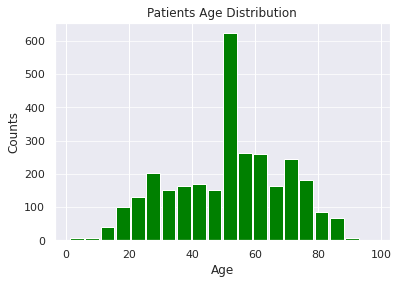

In [ ]:
#visualizing age dirstibution
size, scale = 1000, 10
age = df['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='green')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The distrubution is fairly normal, and Leptokurtic. The Kurtosis is greater than normal. 

We can also observe that the distribution is more concentrated around the mean

####Boxplot

Age

Text(0.5, 1.0, 'Boxplot of Age')

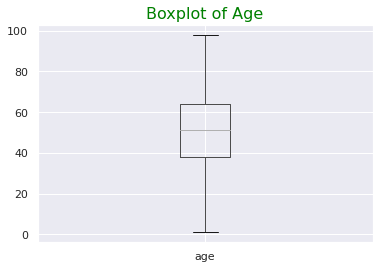

In [ ]:
# Lets check for any outliers using a boxplot
df.boxplot(column=['age'])
plt.title("Boxplot of Age",fontsize=16,color="green")

We find there are no outliers in the data

Sex

This column helps us identify the gender in our dataset 

In [ ]:
df.sex.nunique()
# There are two unique values

2

In [ ]:
df.sex.describe()

count     2938
unique       2
top          F
freq      2049
Name: sex, dtype: object

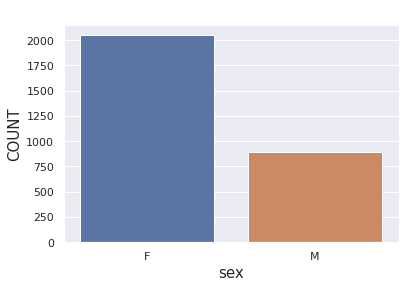

In [ ]:
# Lets visualize the distribution of gender in the dataset
sb.countplot('sex',data = df)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#

From this visualization we observe that female patients entrkies are moreb than double than the male patients. It might be because more women are pron to hypothyroidism than men 

Histograms

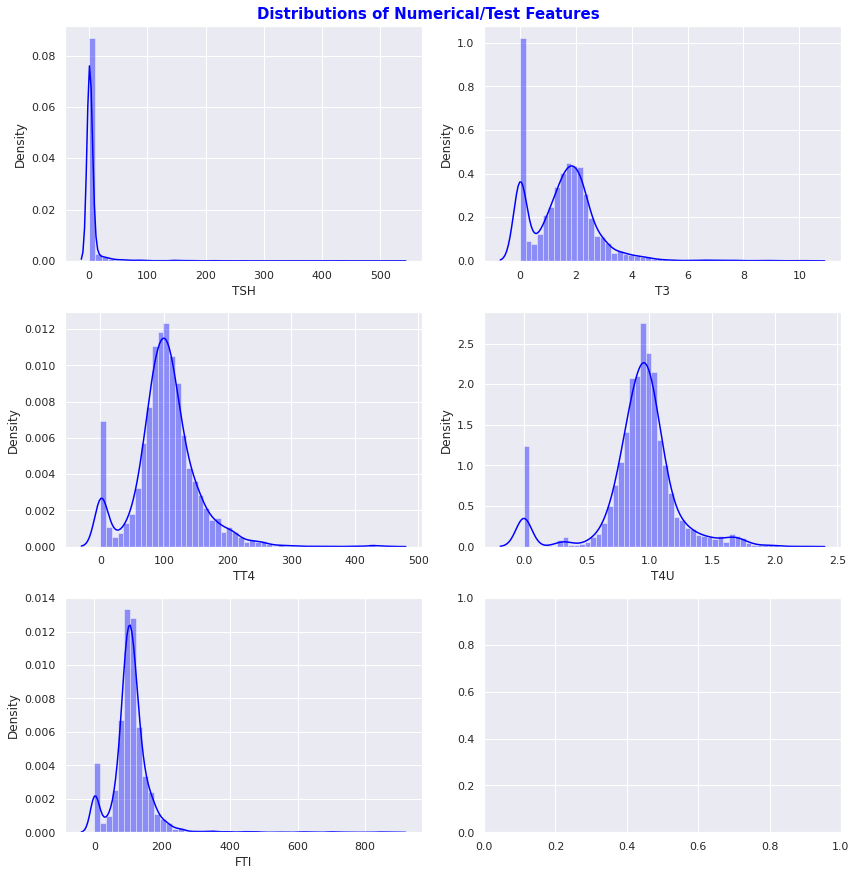

In [ ]:
# We now create histograms for other numerical columns
# the columns are TSH, T3, TT4, T4U, FTI
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), df, numerical_columns_3):
  sb.distplot(df[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

We have observed that TSH, T3, TT4 and FT columns are right skewed

Box plots of the TSH, T3, TT4 and FT

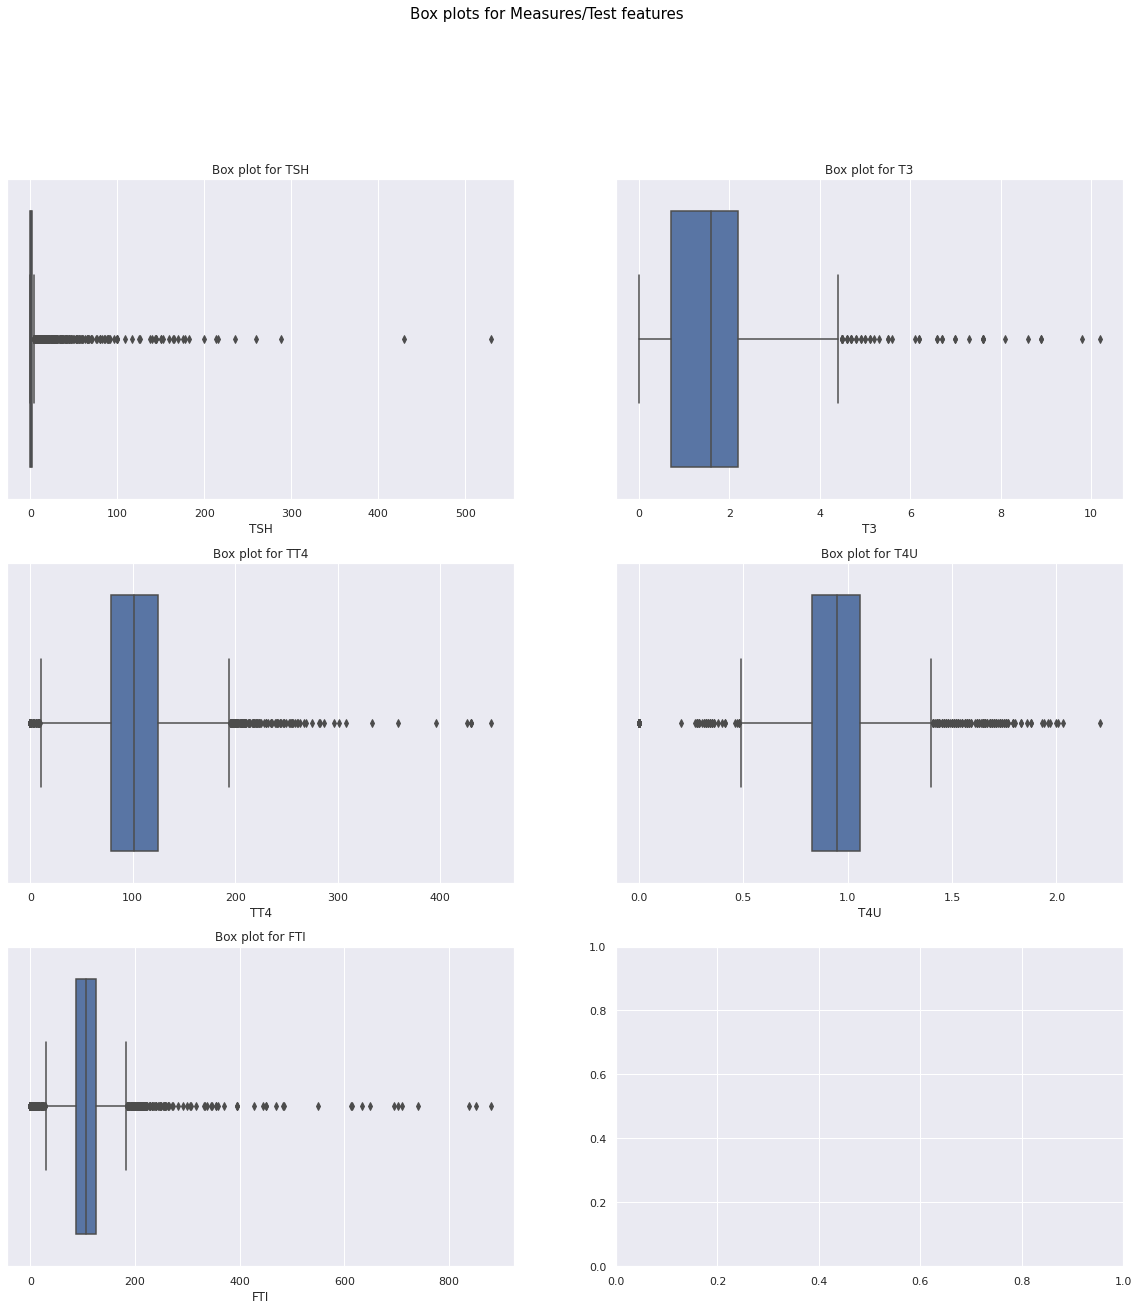

In [ ]:
# Lets use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'black', fontsize = 15)

sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), df, numerical_columns_3):
  sb.boxplot(df[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()

We have found out their are outliers in our numerical columns

##Categorical Columns

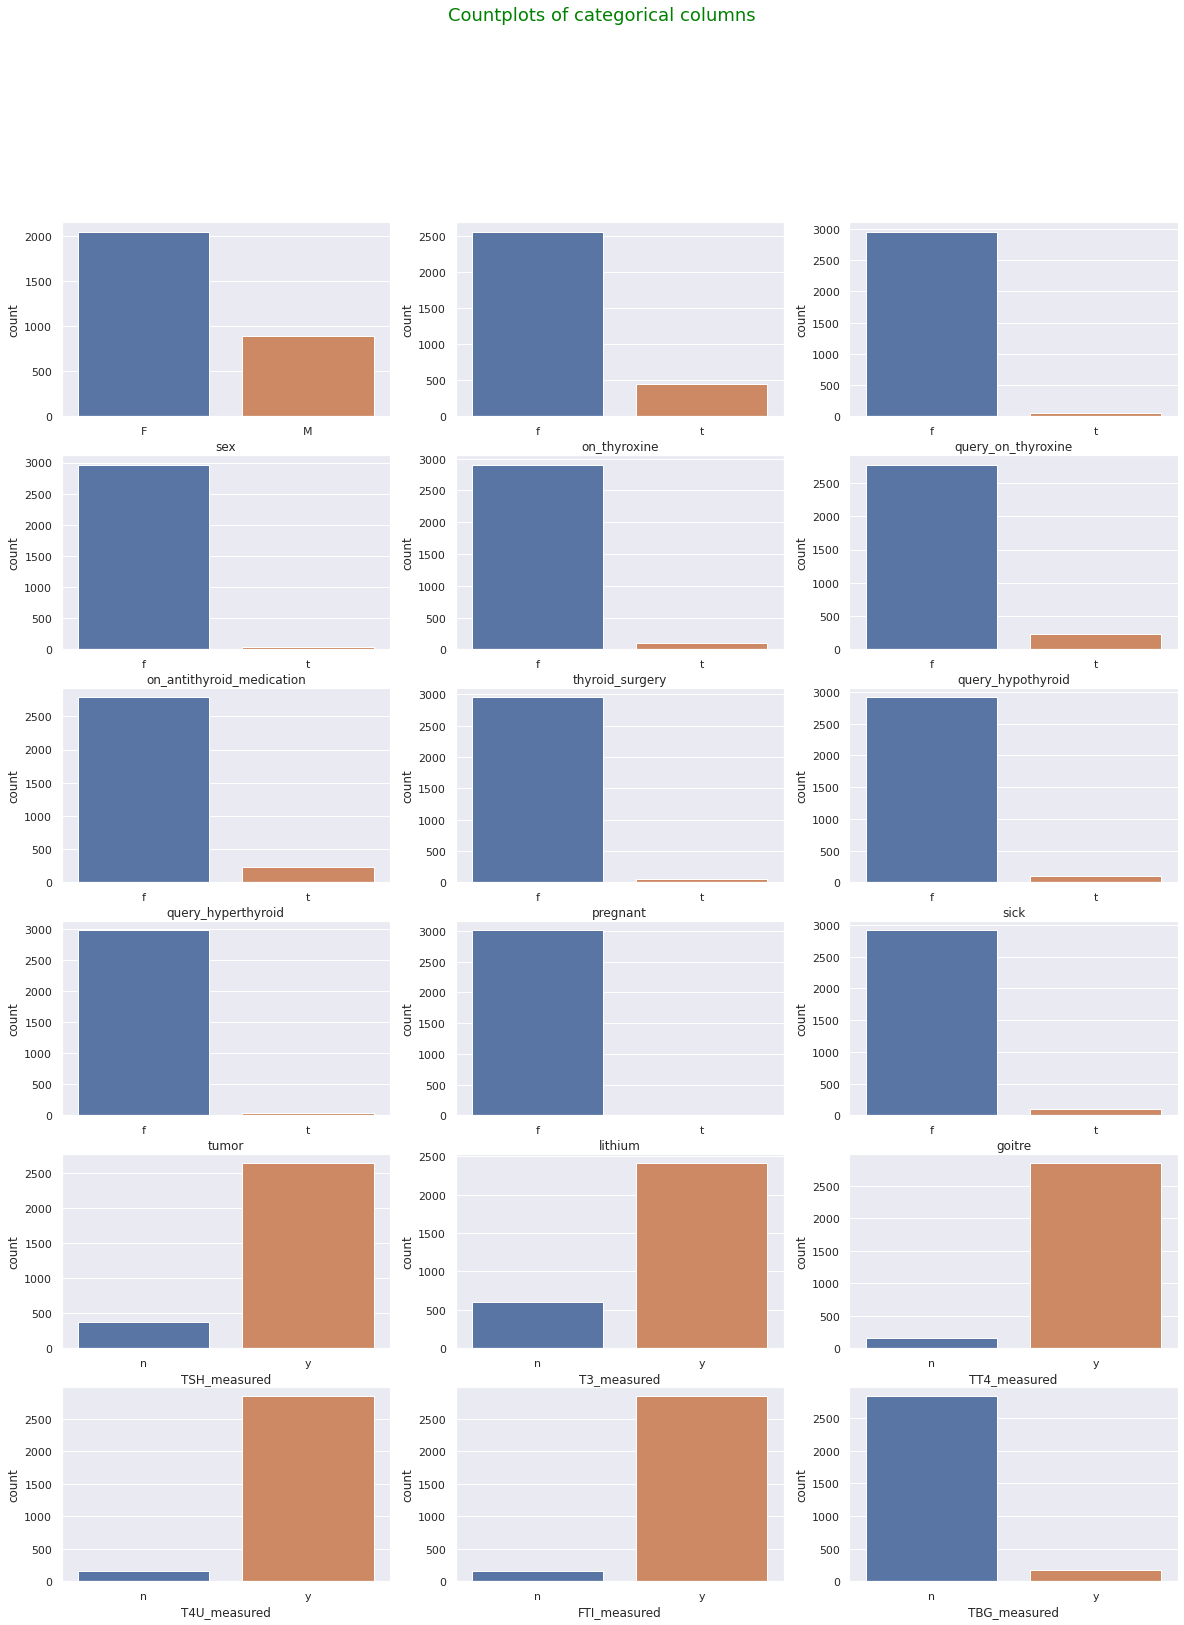

In [ ]:
# Lets find Countplot of categorical columns in the dataset
# We make a list of the columns 
categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = df.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'green')
for ax, data, column in zip(axes.flatten(), df, categorical_columns_1):
   sb.countplot(df[column], ax=ax)

###2. Bivariate Analysis 

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

####Scatter Plots

Text(0.5, 1.0, 'Age vs Sick')

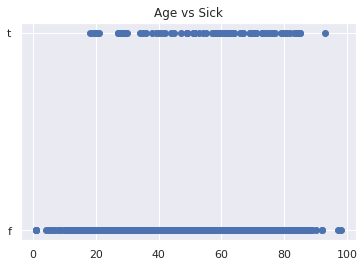

In [ ]:
# Squarefeet
plt.scatter(df.age, df.sick)
plt.title('Age vs Sick')

####Correlation 

In [ ]:
# Let's display the correlations between the variables
corr = df.corr()
corr


,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


Heatmap

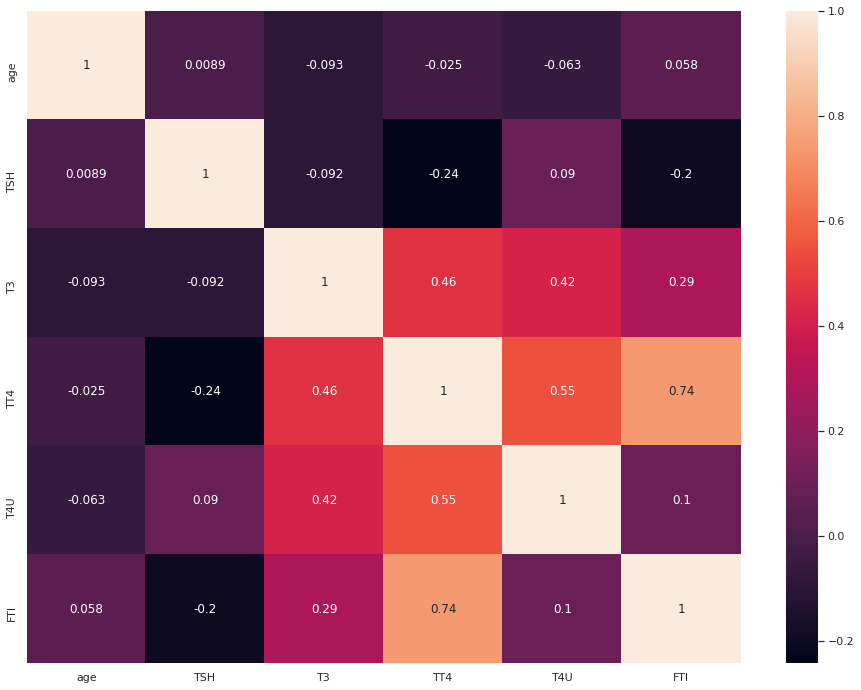

In [ ]:
#visualizing correlation on a heatmap
plt.figure(figsize=(16, 12))
sb.heatmap(corr, annot = True)
plt.show()

##3.Multivariate Analysis

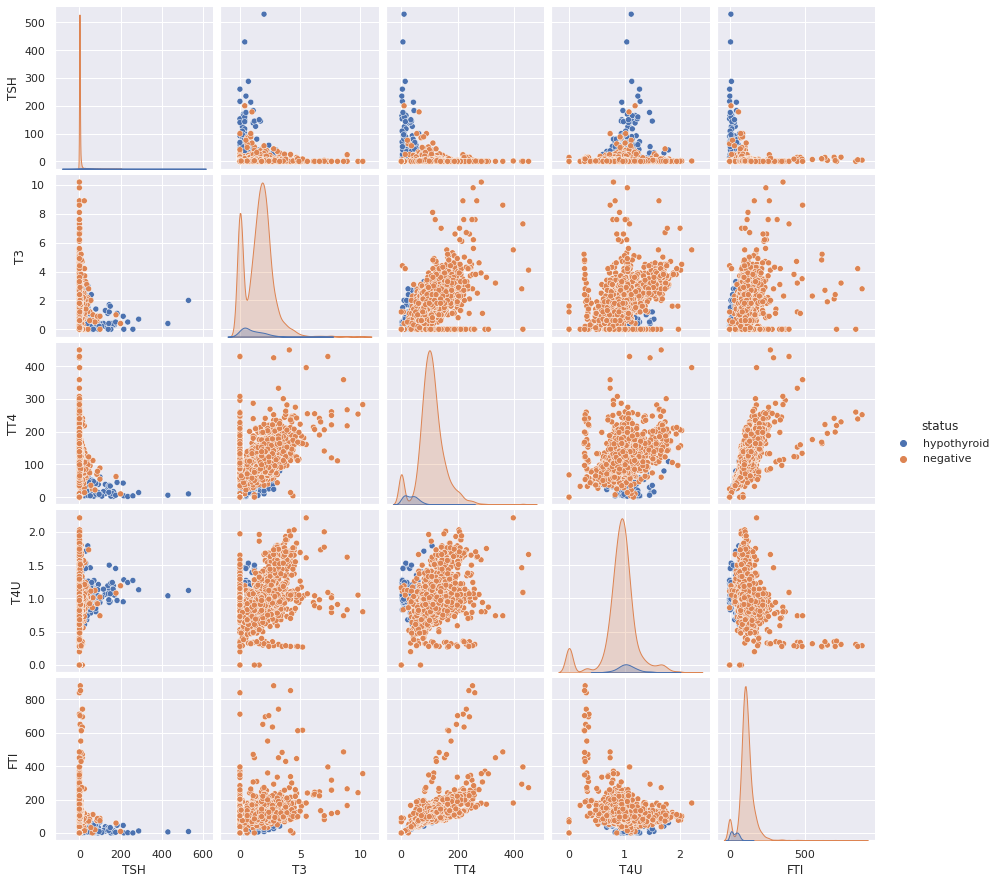

In [ ]:
# A pairplot
# Here we want visualize scatter plots  
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','T3','TT4','T4U','FTI']

sb.pairplot(hypothyroid_3, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()

##PCA

In [ ]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

# X = df.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query_hyperthyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


From the dataframe we can see 10 features that explain the data with most variance 

##Logistic Regression - Modelling 

In [ ]:
from sklearn.linear_model import LogisticRegression

y = hypothyroid_3.status.cat.codes
# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

In [ ]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.9856194690265486
F1_score, average = micro: 0.9856194690265486
F1_score, average = macro: 0.8992515881248555
F1_score, average = weighted: 0.9853099067294102


array([[ 27,   8],
       [  5, 864]])

The model has an accuracy of 98%as seen from the F1 score.  We get to check only the micro and weighted scores since


Micro:- Calculates total true positivies, false negatives and false positives 


Macro:- Calcculates each label and find their unweighted mean 

Weighted:- Calculates each label and find their average weighted by support. 

##Approach 

1. Decision Trees 

Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2141,1,1
566,1,1
2714,1,1
2600,1,1
1941,1,1


In [ ]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

R2 score : 0.70
accuracy_score: 0.9889380530973452
F1_score, average = micro: 0.9889380530973452
F1_score, average = macro: 0.9164911502789788
F1_score, average = weighted: 0.9882497214791185


In [ ]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.011061946902654867
Mean Squared Error: 0.011061946902654867
Root Mean Squared Error: 0.10517579047791781


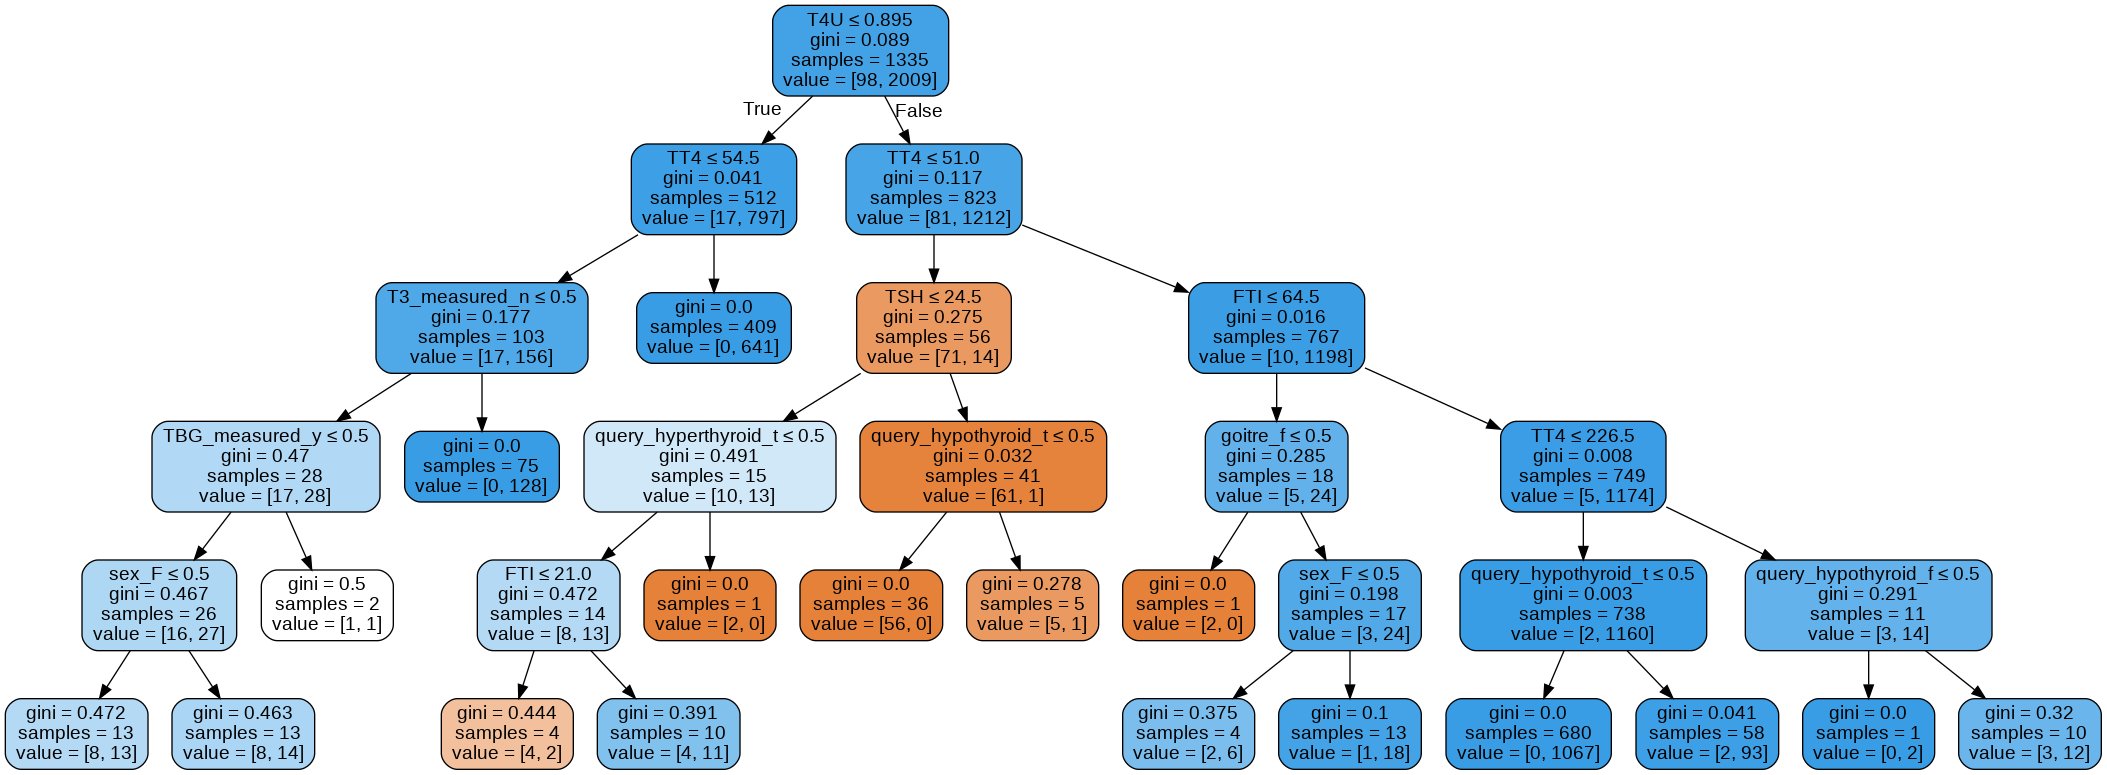

In [ ]:
#Visualizing tree number 50
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

Ada Boosted Trres 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

0.9944690265486725

In [ ]:
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))

F1_score, average = micro: 0.9944690265486725
F1_score, average = macro: 0.9633494692970719
F1_score, average = weighted: 0.9945063849607393


Gradient Boosted Trees

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

In [ ]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.9612831858407079
F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


### 2nd Approach
 2. Support ector Machines(SVM)  

Kernel = polynomial

In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.9612831858407079

In [ ]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9878318584070797

In [ ]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9878318584070797
F1_score, average = macro: 0.9171271178671734
F1_score, average = weighted: 0.9877471820711037


Kernel = rbf

In [ ]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9601769911504425

In [ ]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9601769911504425
F1_score, average = macro: 0.489841986455982
F1_score, average = weighted: 0.9417537305978946


###Challenging the Solution

In [ ]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances
#the list below shows the most important features in the data and the value of how important they are.
# the most important feature is TT4 and it accounts for 79% importance

[('TT4', 0.79),
 ('TSH', 0.07),
 ('T3_measured_n', 0.07),
 ('FTI', 0.02),
 ('goitre_f', 0.02),
 ('T4U', 0.01),
 ('query_hyperthyroid_t', 0.01),
 ('age', 0.0),
 ('T3', 0.0),
 ('sex_F', 0.0),
 ('sex_M', 0.0),
 ('on_thyroxine_f', 0.0),
 ('on_thyroxine_t', 0.0),
 ('query_on_thyroxine_f', 0.0),
 ('query_on_thyroxine_t', 0.0),
 ('on_antithyroid_medication_f', 0.0),
 ('on_antithyroid_medication_t', 0.0),
 ('thyroid_surgery_f', 0.0),
 ('thyroid_surgery_t', 0.0),
 ('query_hypothyroid_f', 0.0),
 ('query_hypothyroid_t', 0.0),
 ('query_hyperthyroid_f', 0.0),
 ('pregnant_f', 0.0),
 ('pregnant_t', 0.0),
 ('sick_f', 0.0),
 ('sick_t', 0.0),
 ('tumor_f', 0.0),
 ('tumor_t', 0.0),
 ('lithium_f', 0.0),
 ('lithium_t', 0.0),
 ('goitre_t', 0.0),
 ('TSH_measured_n', 0.0),
 ('TSH_measured_y', 0.0),
 ('T3_measured_y', 0.0),
 ('TT4_measured_n', 0.0),
 ('TT4_measured_y', 0.0),
 ('T4U_measured_n', 0.0),
 ('T4U_measured_y', 0.0),
 ('FTI_measured_n', 0.0),
 ('FTI_measured_y', 0.0),
 ('TBG_measured_n', 0.0),
 ('TBG_m

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

Using the best features it gives an accurate score of 96%. It means it overfits the data. 

###QUESTIONS 


A). Did I have the right data?

Yes I had the right data. 

B). What else would we need to have in  our Data?

I would prefer the data to have more columns that has more information included to enable us better understand the disease. 

##CONCLUSION

Our data achieved models with accuracy score and F1 score greater than 90%.  In conclusion this means our data was sufficient for training. 
